# Setup

In [39]:
from coba.experiments import Result
from matplotlib import pyplot as plt

c1 = "#E69F00"
c2 = "#0072B2"
c3 = "#009E73"
c4 = "#56B4E9"
c5 = "#D55E00"

plt.rc('font',weight='normal',size=14)

figsize = (6,2.5)
legend  = dict(columnspacing=1,handletextpad=.4,handlelength=1)

def plt_legend(order=[],**kwargs):
    handles, labels = plt.gca().get_legend_handles_labels()
    
    for l in labels:
        print(l)
    
    order = order or range(len(handles))
    plt.legend([handles[i] for i in order], [labels[i] for i in order],**legend,**kwargs)

# Unbounded

In [4]:
#0=para; 1=EMT-CB (self-consistent); 2=EMT-CB (not self-consistent); 3=CMT-CB; 4=PEMT; 5=PCMT
unbounded = Result.from_file('../results/unbounded.log.gz')

We removed 4640 learner evaluations because they were shorter than 4000 interactions.


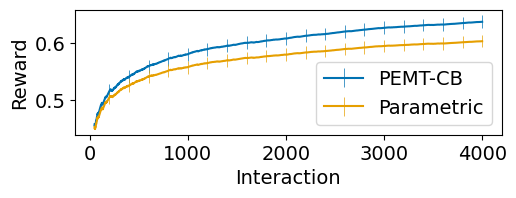

In [40]:
plt.figure(figsize=(5.5,2.5))
unbounded.where(learner_id=[0,4]).filter_fin(4000).plot_learners(labels=['Parametric','PEMT-CB'],err='bs',xlim=[50,4000],colors=[c1,c2],out=None)
plt.title('',loc='left')
plt.legend(loc='lower right')
plt.savefig('overall_final.pdf',format='pdf', bbox_inches="tight")

In [4]:
##Table 1
import numpy as np

algorithms = ["PEMT-CB", "EMT-CB", "PCMT-CB", "CMT-CB", "Parametric"]
indexes = [4,1,5,3,0]
wins = np.zeros([len(unbounded.learners)-1]*2)

for i in range(len(indexes)):
    for j in range(i+1,len(indexes)):
        unbounded.plot_contrast(indexes[i], indexes[j],x='openml_task', err='bs', out=None)
        handles, labels = plt.gca().get_legend_handles_labels()
        i_wins = int(labels[0][labels[0].find('(')+1:labels[0].find(')')])
        j_wins = int(labels[-1][labels[-1].find('(')+1:labels[-1].find(')')])
        wins[i,j] = i_wins
        wins[j,i] = j_wins
        plt.close()

wins

array([[  0., 134., 130., 190., 144.],
       [ 72.,   0., 100., 208., 109.],
       [  5., 103.,   0., 177., 100.],
       [ 23.,  13.,  33.,   0.,  46.],
       [  8., 100.,  14., 164.,   0.]])

Without Self-Consistency Is Best (17)
Tie (12)
With Self-Consistency Is Best (205)


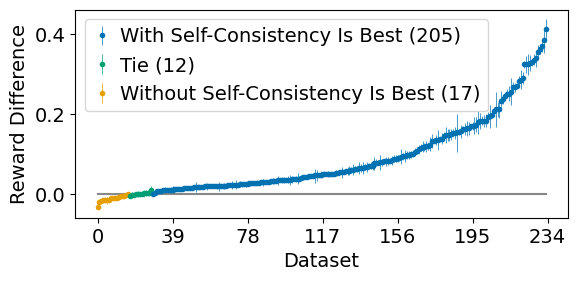

In [5]:
plt.figure(figsize=figsize)
unbounded.plot_contrast(2,1,x='openml_task',err='bs',labels=['Without Self-Consistency Is Best','With Self-Consistency Is Best'],colors=[c1,c3,c2],xticks=False,out=None)
plt.title('',loc='left')
plt_legend([2,1,0],loc='upper left')
plt.xticks([0,39,78,117,156,195,234])
plt.xlabel("Dataset")
plt.ylabel("Reward Difference")
plt.tight_layout()
plt.savefig('consistency_data.pdf',format='pdf', bbox_inches="tight")

We removed 4640 learner evaluations because they were shorter than 4000 interactions.
With Self-Consistency
Without Self-Consistency


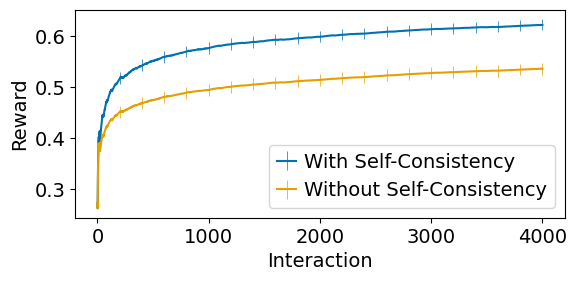

In [6]:
plt.figure(figsize=figsize)
unbounded.where(learner_id=[1,2]).filter_fin(4000).plot_learners(err='bs',labels=['With Self-Consistency','Without Self-Consistency'],colors=[c2,c1],out=None)
plt.title('',loc='left')
plt_legend(loc='lower right')
plt.xticks([0,1000,2000,3000,4000])
plt.tight_layout()
plt.savefig('consistency_time.pdf',format='pdf', bbox_inches="tight")

CMT-CB Is Best (13)
Tie (14)
EMT-CB Is Best (207)


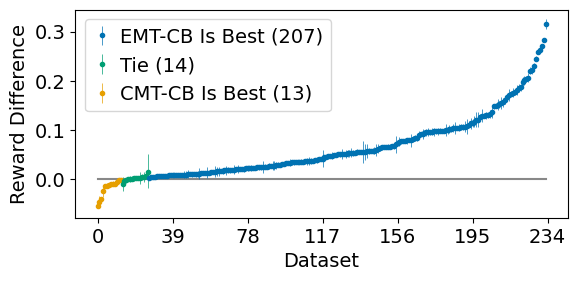

In [7]:
plt.figure(figsize=figsize)
unbounded.plot_contrast(3,1,x='openml_task',err='bs',labels=['CMT-CB Is Best','EMT-CB Is Best'],colors=[c1,c3,c2],xticks=False,out=None)
plt.title('',loc='left')
plt_legend([2,1,0],loc='upper left')
plt.xticks([0,39,78,117,156,195,234])
plt.xlabel("Dataset")
plt.ylabel("Reward Difference")
plt.tight_layout()
plt.savefig('emt_cmt_data.pdf',format='pdf', bbox_inches="tight")

We removed 4640 learner evaluations because they were shorter than 4000 interactions.
EMT-CB
CMT-CB


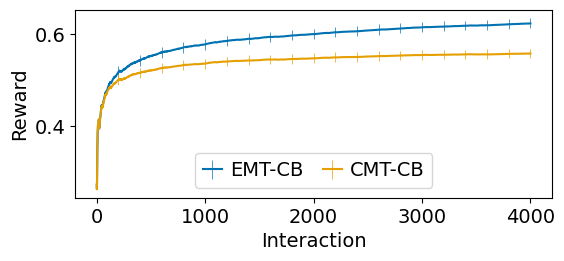

In [37]:
plt.figure(figsize=(6,2.3))
unbounded.where(learner_id=[1,3]).filter_fin(4000).plot_learners(err='bs',labels=['EMT-CB','CMT-CB'],colors=[c2,c1],out=None)
plt.title('',loc='left')
plt_legend(loc='lower center',ncol=2)
plt.xticks([0,1000,2000,3000,4000])
plt.tight_layout()
plt.savefig('emt_cmt_time.pdf', format='pdf', bbox_inches="tight")

Parametric Is Best (100)
Tie (25)
EMT-CB Is Best (109)


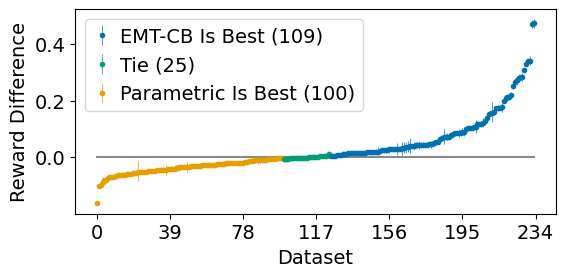

In [41]:
plt.figure(figsize=figsize)
unbounded.plot_contrast(0,1,x='openml_task',err='bs',labels=['Parametric Is Best','EMT-CB Is Best'],colors=[c1,c3,c2],xticks=False,out=None)
plt.title('',loc='left')
plt_legend([2,1,0],loc='upper left')
plt.xticks([0,39,78,117,156,195,234])
plt.xlabel("Dataset")
plt.ylabel("Reward Difference")
plt.tight_layout()
plt.savefig('emt_para_data.pdf', format='pdf', bbox_inches="tight")

We removed 4640 learner evaluations because they were shorter than 4000 interactions.
EMT-CB
Parametric


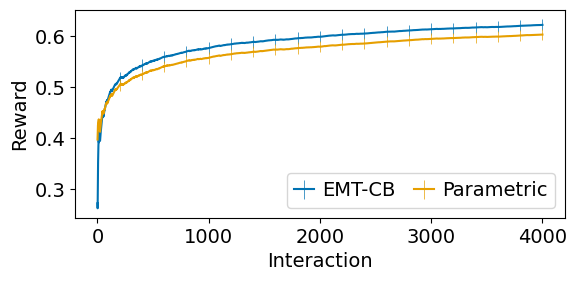

In [10]:
plt.figure(figsize=figsize)
unbounded.where(learner_id=[0,1]).filter_fin(4000).plot_learners(err='bs',labels=['Parametric','EMT-CB','CMT-CB'],colors=[c1,c2,c3],out=None)
plt.title('',loc='left')
plt_legend(loc='lower right',ncol=3)
plt.xticks([0,1000,2000,3000,4000])
plt.tight_layout()
plt.savefig('emt_para_time.pdf', format='pdf', bbox_inches="tight")

Parametric Is Best (9)
Tie (84)
PEMT-CB Is Best (141)


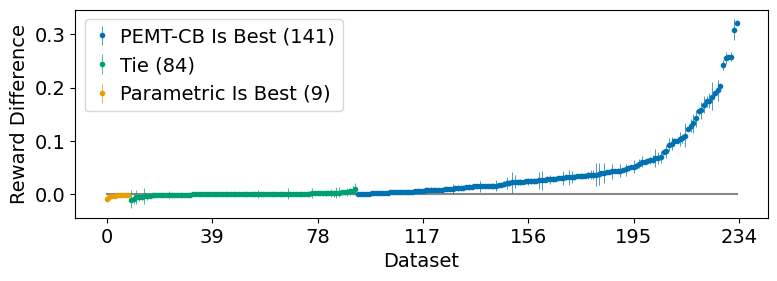

In [11]:
plt.figure(figsize=(8,2.5))
unbounded.plot_contrast(0,4,x='openml_task',err='bs',labels=['Parametric Is Best','PEMT-CB Is Best'],colors=[c1,c3,c2],xticks=False,out=None)
plt.title('',loc='left')
plt_legend([2,1,0],loc='upper left')
plt.xticks([0,39,78,117,156,195,234])
plt.xlabel("Dataset")
plt.ylabel("Reward Difference")
plt.tight_layout()
plt.savefig('pemt_para_data.pdf', format='pdf', bbox_inches="tight")

We removed 6960 learner evaluations because they were shorter than 4000 interactions.
PEMT-CB
PCMT-CB
Parametric


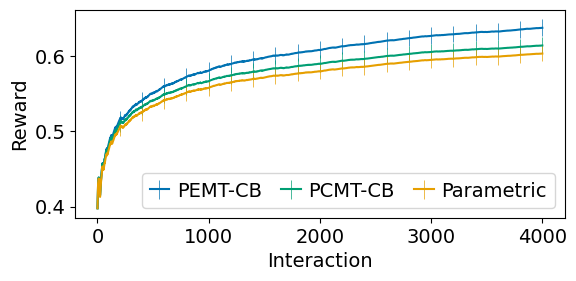

In [12]:
plt.figure(figsize=figsize)
unbounded.where(learner_id=[0,4,5]).filter_fin(4000).plot_learners(err='bs',labels=['Parametric','PEMT-CB','PCMT-CB'],colors=[c1,c2,c3],out=None)
plt.title('',loc='left')
plt_legend(loc='lower right',ncol=3)
plt.xticks([0,1000,2000,3000,4000])
plt.tight_layout()
plt.savefig('pemt_para_time.pdf', format='pdf', bbox_inches="tight")